<a id='top'></a>
# *Laboratory 11*

Пакет суулгах заавар


    pip install linkpred

In [1]:
# linkpred пакетыг импортлох
import linkpred

In [2]:
# график зурахад шаардлагатай сангуудыг импортлох
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# файлаас жинтэй сүлжээг уншиж авах функц
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1], weight=int(l[2]))
    return g

# Game of Thrones өгөгдлийг ачаалах
g = read_net_w(f'data/asioaf/got-s6-edges.csv')

In [4]:
# Нийтлэг хөршүүдийн аргаар холбоос таамаглах
# Бид зөвхөн шинэ холбоосуудыг урьдчилан таамаглахыг зорьж байгаа тул одоо байгаа холбоосуудыг хасч байна
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges())
cn_results = cn.predict()

# Хамгийн өндөр оноотой 5 холбоосыг харуулах
top = cn_results.top(5)
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


In [5]:
# Жаккардын аргаар холбоос таамаглах
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

# Хамгийн өндөр оноотой 5 холбоосыг харуулах
top = jc_results.top(5)
for edge, score in top.items():
    print(edge, score)

RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


In [6]:
# Адамик-Адарын аргаар холбоос таамаглах
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

# Хамгийн өндөр оноотой 5 холбоосыг харуулах
top = aa_results.top(5)
for edge, score in top.items():
    print(edge, score)

TOMMEN - MACE 3.187557281030789
NED - LADY_CRANE 3.1263711657257836
NED - CLARENZO 3.1263711657257836
SANSA - ROBB 3.096644315133246
JOFFREY - CAMELLO 2.8944937119329133


In [7]:
# Катзын аргаар холбоос таамаглах
kz = linkpred.predictors.Katz(g, excluded=g.edges())
kz_results = kz.predict()

# Хамгийн өндөр оноотой 5 холбоосыг харуулах
top = kz_results.top(5)
for edge, score in top.items():
    print(edge, score)

Computing matrix powers: [############################################################] 5/5
LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996


In [8]:
# Графикийн зай аргаар холбоос таамаглах
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
gd_results = gd.predict()

# Хамгийн өндөр оноотой 5 холбоосыг харуулах
top = gd_results.top(5)
for edge, score in top.items():
    print(edge, score)

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


In [9]:
# SimRank аргаар холбоос таамаглах
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
simrank_results = simrank.predict(c=0.5)

# Хамгийн өндөр оноотой 5 холбоосыг харуулах
top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834453
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.3198896231578195


In [10]:
# Санамсаргүй аргаар холбоос таамаглах
rnd = linkpred.predictors.Random(g, excluded=g.edges())
rnd_results = rnd.predict()

# Хамгийн өндөр оноотой 5 холбоосыг харуулах
top = rnd_results.top(5)
for edge, score in top.items():
    print(edge, score)

RANDYLL - BELICHO 0.9999780334333523
YOHN_ROYCE - SEPTA_UNELLA 0.9999717268765979
DAVOS - BRAN 0.9998098495999727
MEERA - MACE 0.9995079851026014
OBARA - GREY_WORM 0.9993305314930677


In [11]:
# Нэмэлт сангуудыг импортлох
import random
import itertools
from linkpred.evaluation import Pair

# Тестийн сүлжээг ачаалах
test = read_net_w(f'data/asioaf/got-s7-edges.csv')

# Тестийн сүлжээг сургалтын үе шатнаас хасах
training = g.copy()

# Оройн олонлог
nodes = list(g.nodes())
nodes.extend(list(test.nodes()))

# Тестийн олонлог ба орон зайн олонлогийг тооцоолох
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [12]:
# Нийтлэг хөршүүдийн аргаар холбоос таамаглах
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

# Адамик-Адарын аргаар холбоос таамаглах
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

# Жаккардын аргаар холбоос таамаглах
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [13]:
# Үнэлгээний хуудас үүсгэх
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

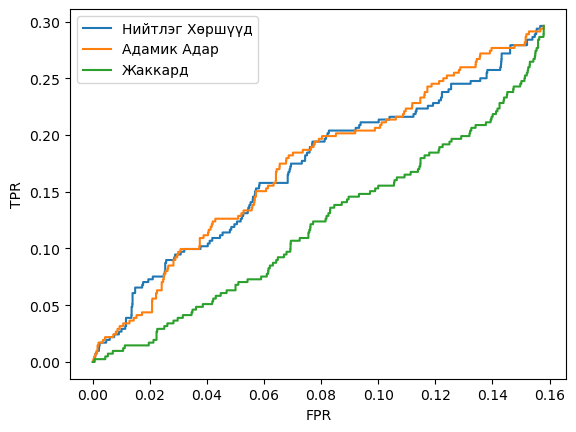

In [14]:
# ROC муруйг зурах
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Нийтлэг Хөршүүд")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Адамик Адар")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Жаккард")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

In [15]:
# sklearn сангаас auc функцийг импортлох
from sklearn.metrics import auc

# ROC муруйн доорх талбайг тооцоолох
print("ROC муруйн доорх талбай (AUROC)")
print(f"Нийтлэг Хөршүүд: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Адамик Адар: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Жаккард: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")

ROC муруйн доорх талбай (AUROC)
Нийтлэг Хөршүүд: 	 0.026832485313825823
Адамик Адар: 	 0.027259025673933773
Жаккард: 	 0.018894838921578106


Дүгнэлт

Энэ удаагийн туршилтаараа бид сүлжээн дэх холбоосуудыг урьдчилан таамагладаг хэд хэдэн аргыг судалж, аль нь илүү сайн ажилладгийг харьцуулж үзлээ. Бид алдарт "Game of Thrones" цувралын 6-р улирлын дүрүүдийн хоорондын харилцааны мэдээллийг ашиглаад, 7-р улиралд ямар шинэ холбоосууд үүсэж болохыг таамаглахыг зорьсон юм.

Гол үр дүнгүүд:

"Нийтлэг хөршүүд", "Адамик Адар", "Жаккард" гэсэн аргууд хамгийн сайн таамаглаж байсан. Ялангуяа "Адамик Адар" арга нь үр дүнгийн үзүүлэлтээр (ROC муруйн доорх талбай буюу AUC) хамгийн оновчтой нь байлаа.
Харин "Катз", "SimRank" шиг сүлжээний ерөнхий бүтцийг хардаг аргууд нь илүү төвөгтэй сүлжээнд сайн ажиллах боломжтой ч, тооцоолол хийхэд нэлээд нөөц шаарддаг сул талтай байв.
Дүрүүдийн хоорондын "зайн"-д тулгуурлаж таамаглах нь ч холбоо үүсэх магадлалыг тодорхойлох сонирхолтой арга гэдэг нь харагдлаа.
Мэдээж, ямар ч аргачлалгүйгээр санамсаргүй байдлаар таамаглахад хамгийн муу үр дүн гарсан. Энэ нь бидний таамаглаж байсантай таарч, бусад аргуудыг харьцуулах жишиг болж өглөө.

*Жаккард болон Адамик Адар хоёр яагаад ялгаатай үр дүн үзүүлж байна вэ?*

Жаккард болон Адамик Адар хоёр алгоритм нь тооцооллын аргачлалаараа үндсэн ялгаатай. Жаккард нь хоёр оройн нийтлэг хөршүүдийг тэдгээрийн нийт хөршүүдэд харьцуулж, бүх хөршүүдийг адил ач холбогдолтой гэж үздэг. Харин Адамик Адар нь хөршүүдийн холбоосын тоонд суурилсан жин оноож, бага зэрэгтэй (цөөн холбоостой) хөршүүдэд илүү их ач холбогдол өгдөг. Game of Thrones сүлжээнд Адамик Адар нь илүү үр дүнтэй байгаа нь бага зэрэгтэй оройнуудын холбоосууд нь тус сүлжээнд илүү чухал гэсэн үг юм.

*Linkpred санг ашиглан decision tree алгоритмаар холбоосыг илрүүлж болох уу?*

Тийм, linkpred санг decision tree алгоритмтай хослуулан ашиглаж болно, гэхдээ шууд дэмжлэг байхгүй. Үүнийг хэрэгжүүлэхдээ linkpred-ийн таамаглагчуудыг ашиглан шинж чанаруудыг (Нийтлэг хөршүүд, Жаккард, Адамик Адар гм) гаргаж авч, sklearn сангийн DecisionTreeClassifier-т оруулна. Эерэг жишээ (байгаа холбоосууд) ба сөрөг жишээ (байхгүй холбоосууд) бэлтгэж, загвар сургаад шинэ холбоосуудыг таамаглана. Энэ нь олон төрлийн шинж чанаруудыг нэгтгэх, машин сургалтын хүчийг ашиглах боломжийг олгодог.